<a href="https://colab.research.google.com/github/bnnguyen/AUTOMATIC_PRIME_FACTORIZATION/blob/main/Deslab_2024_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Create a classification dataset with 20 features, where 15 of them are informative and 5 are redundant
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, n_classes=2)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Applying PCA

Bây giờ bạn muốn tìm PCA xác định để sử dụng K tính năng hàng đầu từ dữ liệu trên.
Để xác thực một số, hãy lặp lại tất cả các giá trị từ 1 đến 20 và xem liệu chúng ta có tìm thấy điểm nào đó có thể chấp nhận được hay không.

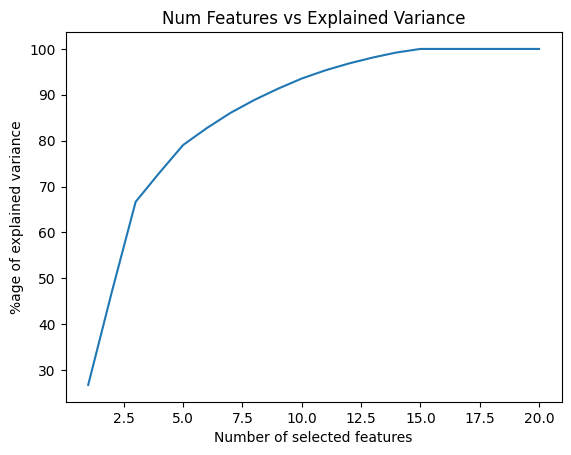

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_num_component_vs_explained_variance(X_train):
    pca = PCA(n_components=X_train.shape[1])
    X_train_pca = pca.fit_transform(X_train)
    x_axis = [i+1 for i in range(X_train.shape[1])]
    y_axis = [np.sum(pca.explained_variance_ratio_[:i+1]) * 100 for i in range(X_train.shape[1])]

    plt.clf()
    plt.plot(x_axis, y_axis)
    plt.xlabel("Number of selected features")
    plt.ylabel("%age of explained variance")
    plt.title("Num Features vs Explained Variance")
    plt.show()

plot_num_component_vs_explained_variance(X_train)

Đây là một biểu đồ hữu ích cho chúng ta, vì chúng ta gần như có thể nhìn vào biểu đồ này và biết rằng sau 15 đặc điểm, có 0 phương sai được giải thích và ví dụ: nếu bạn đồng ý chỉ giữ lại 80% phương sai, bạn có thể sử dụng biểu đồ trên cùng. 7 tính năng.

Giả sử rằng chúng ta muốn làm việc với 90% phương sai, điểm giới hạn dường như nằm ở khoảng 10 đặc điểm. Điều đó thật tuyệt! Chúng ta đã mất 10% thông tin nhưng lại giảm quy mô vấn đề xuống một nửa!

In [ ]:
def make_pca(X_train, num_components):
    pca = PCA(n_components = num_components)
    X_train_pca = pca.fit_transform(X_train)
    return pca, X_train_pca

Hàm này ở trên xây dựng một biến áp PCA cho chúng ta để chọn các tính năng `num_components` hàng đầu và trả về cho chúng ta đối tượng PCA mà chúng ta có thể sử dụng để chuyển đổi dữ liệu thử nghiệm cũng như dữ liệu đã chuyển đổi.

Hãy nhớ rằng, điều cực kỳ quan trọng là bạn phải chuyển đổi dữ liệu thử nghiệm của mình bằng cùng một PCA, nếu không bạn sẽ gặp lỗi!

Hãy tiếp tục với PCA gồm 10 tính năng cũng như các bộ thử nghiệm và huấn luyện đã được sửa đổi.

In [ ]:
pca_10, X_train_pca_10 = make_pca(X_train, num_components = 10)
X_test_pca_10 = pca_10.transform(X_test)

Tuyệt vời, bây giờ chúng ta đã có dữ liệu đã sửa đổi. Chúng ta sẽ làm việc với nó!

# Neural Networks

Bây giờ chúng ta đã có tập dữ liệu đã được giảm kích thước thông qua PCA, hãy xây dựng một số mạng thần kinh trên đó.

Như thường lệ, sklearn khiến công việc của bạn trở nên thực sự dễ dàng. Tất cả những gì bạn phải làm là nhập một số giá trị và nó sẽ thực hiện phần còn lại của công việc cho bạn.

Chúng ta có 10 feature, vì vậy hãy xây dựng Neural Networks như sau:

1. Ta có đầu vào (10 tính năng)
2. Lớp ẩn thứ nhất có 10 nơ-ron.
3. Lớp ẩn thứ 2 với 8 nơ-ron.
4. Lớp ẩn thứ 3 với 5 nơ-ron.
5. Cuối cùng là lớp đầu ra phát ra xác suất.
6. Đối với trình tối ưu hóa của chúng tôi, chúng ta sẽ sử dụng "adam".
7. Để kích hoạt, chúng tôi sẽ sử dụng `ReLu`
8. Chúng ta sẽ sử dụng chính quy hóa L2 và đặt cường độ alpha của chính quy hóa là 0,001
9. Chúng tôi muốn sử dụng tỷ lệ học là 0,001
10. Nếu mức cải thiện của chúng tôi nhỏ hơn 0,0001 (`tol`) trong 10 lần lặp (`n_iter_no_change`), chúng tôi muốn ngừng đào tạo.
11. Chúng ta không muốn chạy hơn 10000 lần lặp.

In [ ]:
nn_clf_pca_10 = MLPClassifier(
    hidden_layer_sizes = (10, 8, 5),
    activation = 'relu',
    solver = 'adam',
    alpha = 0.001,
    learning_rate_init = 0.001,
    tol = 0.0001,
    n_iter_no_change=10,
    max_iter = 10000
)

Có rất nhiều tham số, nhưng mạng lưới thần kinh của chúng ta đã sẵn sàng! Lưu ý rằng lớp Mạng thần kinh này không cần bất kỳ thông tin nào về số lượng tính năng trong tập dữ liệu hoặc số lượng class bạn đang cố gắng phân loại nó.

Nó đủ thông minh để xem xét dữ liệu và suy ra những giá trị đó.

Hãy luyện tập một chút nào! Lần này, chúng ta hãy ghi lại xem phải mất bao lâu để thực hiện một số thao tác huấn luyện và suy luận!

In [ ]:
import time

pca_10_train_start_time = time.time()
nn_clf_pca_10.fit(X_train_pca_10, y_train)
pca_10_train_total_time = time.time() - pca_10_train_start_time

pca_10_test_start_time = time.time()
pca_10_score = nn_clf_pca_10.score(X_test_pca_10, y_test)
pca_10_test_total_time = time.time() - pca_10_test_start_time

print(f"Training finished in {pca_10_train_total_time} seconds")
print(f"Score: {pca_10_score}. Scoring took {pca_10_test_total_time} seconds")

Training finished in 25.967262029647827 seconds
Score: 0.9255. Scoring took 0.009555816650390625 seconds


For fun, chúng ta cũng hãy làm điều tương tự với tập dữ liệu ban đầu của chúng ta!

In [ ]:
nn_clf = MLPClassifier(
    hidden_layer_sizes = (10, 8, 5),
    activation = 'relu',
    solver = 'adam',
    alpha = 0.001,
    learning_rate_init = 0.001,
    tol = 0.0001,
    n_iter_no_change=10,
    max_iter = 10000
)

orig_train_start_time = time.time()
nn_clf.fit(X_train, y_train)
orig_train_total_time = time.time() - orig_train_start_time

orig_test_start_time = time.time()
orig_score = nn_clf.score(X_test, y_test)
orig_test_total_time = time.time() - orig_test_start_time

print(f"Training finished in {orig_train_total_time} seconds")
print(f"Score: {orig_score}. Scoring took {orig_test_total_time} seconds")

Tuyệt vời, giờ đây chúng ta có một số dữ liệu mà chúng ta có thể dùng để hình dung rõ hơn tác động của việc sử dụng PCA.

Vì chúng ta đang xác định nhiều biểu đồ, hãy viết một hàm trợ giúp đơn giản để giảm trùng lặp code

In [ ]:
def plot_comparison(x, y, x_label, y_label, title, colors):
    plt.clf()

    plt.bar(x, y, color = colors)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.show()

x = ['PCA_10', 'Original']

plot_comparison(x, [pca_10_score, orig_score], "Type Of Dataset", "Accuracy Score", "Dataset Type vs Accuracy", ["blue", "green"])
plot_comparison(x, [pca_10_test_total_time, orig_test_total_time], "Type Of Dataset", "Time for Inference", "Dataset Type vs Testing Time", ["blue", "green"])
plot_comparison(x, [pca_10_train_total_time, orig_train_total_time], "Type Of Dataset", "Time to Train", "Dataset Type vs Training Time", ["blue", "green"])
